In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

#Load dataset
file = pd.read_csv("clustering-data.csv",names = ["A","B"])
df = pd.DataFrame(file)

In [12]:
df

,A,B
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2
5,5.0,3.0
6,4.9,3.1
7,6.7,3.1
8,5.1,3.8
9,6.0,3.0


array([[5.9, 3.2],
       [4.6, 2.9],
       [6.2, 2.8],
       [4.7, 3.2],
       [5.5, 4.2],
       [5. , 3. ],
       [4.9, 3.1],
       [6.7, 3.1],
       [5.1, 3.8],
       [6. , 3. ]])

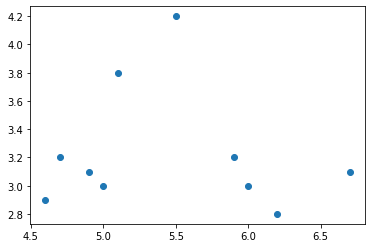

In [16]:
plt.scatter(df['A'],df['B'])
X = np.array(df)

Initial centroid:
 [[6.2 2.8]
 [6.  3. ]
 [4.7 3.2]]
Distance between centroid and records:
 [[0.5        0.2236068  1.2       ]
 [1.60312195 1.40356688 0.31622777]
 [0.         0.28284271 1.55241747]
 [1.55241747 1.31529464 0.        ]
 [1.56524758 1.3        1.28062485]
 [1.21655251 1.         0.36055513]
 [1.33416641 1.1045361  0.2236068 ]
 [0.58309519 0.70710678 2.00249844]
 [1.48660687 1.20415946 0.72111026]
 [0.28284271 0.         1.31529464]]
Labels of each records :
 [1 2 0 2 2 2 2 0 2 1]
New centroids= [[6.45       2.95      ]
 [5.95       3.1       ]
 [4.96666667 3.36666667]]
Distance between centroid and records:
 [[0.6041523  0.1118034  0.94809751]
 [1.85067555 1.36473441 0.59348313]
 [0.29154759 0.39051248 1.35728487]
 [1.76776695 1.25399362 0.31446604]
 [1.57003185 1.18848643 0.98938814]
 [1.45086181 0.95524866 0.3681787 ]
 [1.55724115 1.05       0.27487371]
 [0.29154759 0.75       1.75372619]
 [1.59530561 1.10113578 0.45338235]
 [0.45276926 0.1118034  1.09645895]]
Labels

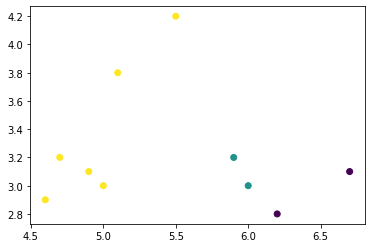

In [17]:
#Using K-Means to cluster the data

k=3# random guessing 3 clusters
n = X.shape[0]

#initial centroids
centers = X[np.random.choice(n,k,replace=False)]
print("Initial centroid:\n",centers)
closest = np.zeros(n).astype(int)

while True:
    old_closest = closest
    #distance between the centroid and records using scipy's cdist
    distance = cdist(X,centers)
    print("Distance between centroid and records:\n",distance)
    
    #find index of minimum distances and assign that record to a label/cluster
    closest = np.argmin(distance,axis=1)
    print("Labels of each records :\n",closest)

    #Compute new centroids
    for i in range(k):
        centers[i,:] = X[closest == i].mean(axis=0)
    print("New centroids=",centers)
    
    if all(closest ==old_closest):
        break


#visialize
plt.scatter(X[:,0],X[:,1],c=closest)